In [35]:
# Work with vectors
import numpy as np

# Data 
import pandas as pd
from pandas import Series, DataFrame, concat
from pandas.tools.plotting import lag_plot
from pandas.tools.plotting import autocorrelation_plot

# Plots
from matplotlib import pyplot
pyplot.style.use('ggplot')

# Statistics, models
from statsmodels.stats.stattools import durbin_watson as d_w
from statsmodels.tsa.ar_model import AR
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA


# Sklearn
from sklearn.metrics import mean_squared_error

In [36]:
#####___R^2_____#####

def r_square(y_i, y_predictions):
    y_avg = np.sum(y_i)/len(y_i)
    SSE = np.sum(np.square(np.subtract(y_i,y_predictions)))
    SST = np.sum(np.square(np.subtract(y_i,y_avg)))
    #print(y_i, np.subtract(y_i, y_avg))
    #print('SSt, SSREg ', SST, SSReg)
    Rsquared = 1 - SSE/SST 
    print('R^2: %.3f' %Rsquared)
    return Rsquared

In [37]:
################____DW_____#################

def durbin_watson(y_i, y_predictions):
    dw = d_w(np.subtract(y_i,y_predictions))
    print('Durbin-Watson: %.3f' %dw)
    return dw

_ = '''y_i_1 = X[prediction_start-1:len(X)-1][::]
y_i_dw = X[prediction_start:][::]
y_predictions_dw = y_predictions[1:][::]
y_1_predictions = y_predictions[0:len(y_predictions)-1][::]

print ('y_predictions:', y_predictions, len(y_predictions))

print ('y_i_dw:  ', y_i_dw, len(y_i_dw))
print ('y_predictions_dw:', y_predictions_dw, len(y_predictions_dw))
print ('y_i_1:  ', y_i_1, len (y_i_1))
print ('y_1_predictions:', y_1_predictions, len(y_1_predictions))


y_i_dw_y_pred = np.subtract(y_i_dw,y_predictions_dw)
y_predicted_y = np.subtract(y_i,y_predictions);
y_i_1_predicted_y_i_1 = np.subtract(y_i_1,y_1_predictions);
print('y_predicted_y__1', y_i_1_predicted_y_i_1)

chislitel = np.sum(np.square(np.subtract(np.subtract(y_i_dw,y_predictions_dw),y_i_1_predicted_y_i_1)))
znamenatel = np.sum(np.square(np.subtract(y_i,y_predictions)))
DW = chislitel/znamenatel
print('DW: ', DW)
'''

In [38]:
def mape(a, b): 
    mask = a != 0
    mean_absolute_percentage_error = (np.fabs(a - b)/a)[mask].mean()
    print("MAPE %.3f" % (mean_absolute_percentage_error * 100))
    return mean_absolute_percentage_error

In [39]:
################____SSE_____#################
def sse(test, predictions):
    resids = np.sum(np.square(np.subtract(test, predictions)))
    print("SSE %.3f" % resids)
    return resids

In [40]:
################____MSE_____#################
def mse(test, predictions):
    return sse(test, predictions)/len(test)

In [41]:
################____RMSE_____#################
def rmse(test, predictions):
    root_mean_square_error = mse(test, predictions) ** 0.5
    print("RMSE %.3f" % root_mean_square_error)
    return root_mean_square_error

In [42]:

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = check_arrays(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [43]:
###############_____theil inequality coefficient_____############
def theil(fact_sample,predicted_sample):
    resids = np.sum(np.square(np.subtract(fact_sample, predicted_sample)))
    u = (resids/(np.sum(np.square(fact_sample))+np.sum(np.square(predicted_sample)))) ** 0.5
    print('Theil coefficient %.3f' %u)
    return u

Initial data


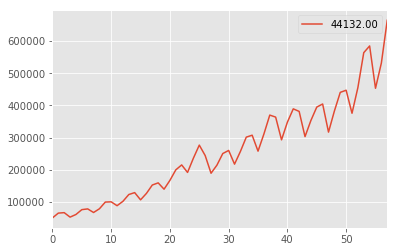

In [44]:
##########______Download_the_file_______########

data = pd.read_csv('gdp.csv', header=0)
frame = pd.DataFrame(data=data)
print("Initial data")
frame.plot()
pyplot.show()



/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  app.launch_new_instance()


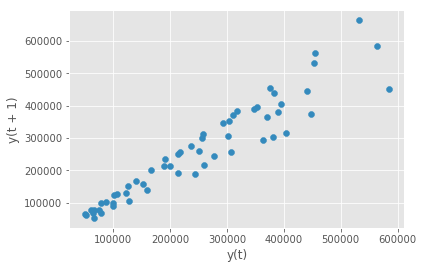

In [45]:
##########______Lag_Plot_______###########

lag_plot(frame)
pyplot.show()

In [46]:
##########______Correlation_matrix_______########

dataframe = concat([frame.shift(1), frame], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.949794
t+1  0.949794  1.000000


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  app.launch_new_instance()


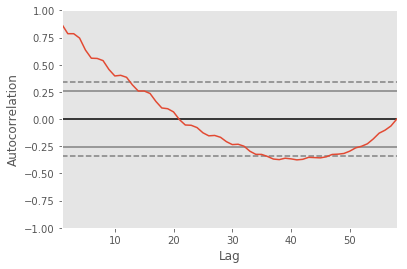

In [47]:
##########______Swing_in_+_-_correlation_______########

autocorrelation_plot(frame)
pyplot.show()


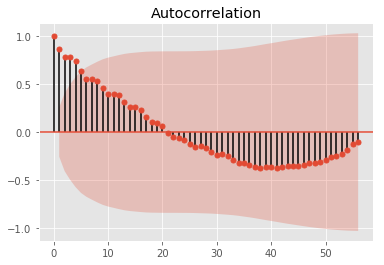

In [48]:
##########______Autocorrelation_plot_classic_______########

plot_acf(frame, lags=56)
pyplot.show()

#from statsmodels.tsa.stattools import acf
#acf(frame, nlags=20)
#pyplot.show()



In [49]:
# split dataset
X = Series.from_csv('gdp-with-dates.csv', header=None).values
train, test = X[0:len(X)-3], X[len(X)-3:]

model AR(10):
y(k) = 6949 + 1.262 y(k - 1) - 0.430 y(k - 2) - 0.007 y(k - 3) + 0.605 y(k - 4) - 0.666 y(k - 5) - 0.022 y(k - 6) + 0.038 y(k - 7) + 0.564 y(k - 8) - 0.810 y(k - 9) + 0.497 y(k - 10) 


y_predictions:  [ 101584.8108057   105293.71141287   87274.0186468   103248.52543413
  125647.68839262  125729.05865253  115519.08650614  118278.41306576
  153879.45819176  156446.47953747  139045.6756836   156647.93352718
  197798.99179571  205711.50552679  187785.21983951  214260.61776004
  270052.64764397  280799.80611169  194737.89671924  216978.73742903
  254850.65165557  237636.95554925  213628.58083935  261271.77567184
  309599.27453016  299335.45522174  270745.3569173   301311.66298324
  364577.242834    376273.8552161   295427.00723584  336901.43132755
  409993.15834553  380058.04530707  303332.75869391  363341.37521996
  415503.91867313  386253.68323988  333548.94027251  388197.40423679
  445338.40122741  454369.43660319  361876.88485176  455217.5416754
  524317.20693387  584823.

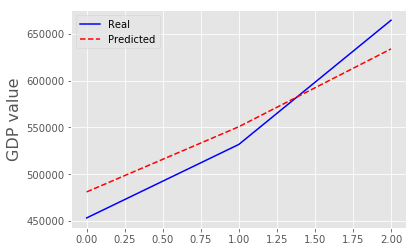

Model statistics:

SSE 9094140524.830
R^2: 0.990
Durbin-Watson: 2.078


In [50]:
##########_____Static_AR_model_____########

# train autoregression
model = AR(train)
model_fit = model.fit()

print('model AR(%s):' % model_fit.k_ar)
print ('y(k) = %3.f' %model_fit.params[0], end = " ")
for i in range(1,model_fit.k_ar+1):
    if (model_fit.params[i] > 0):
        print ('+ %.3f' % model_fit.params[i], 'y(k - %d)' % i, end = " ")
    else:
        print ('- %.3f' % abs(model_fit.params[i]),'y(k - %d)' %i, end = " ")
print ('\n')

# make predictions
#predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

#print last 3 predicted values of sample
#for i in range(len(predictions)):
#	print('predicted=%f, expected=%f' % (predictions[i], test[i]))

prediction_start = len(model_fit.params)
y_predictions = model_fit.predict(start=prediction_start - 1, end=len(X) - 1, dynamic=False)

predictions = y_predictions[-len(test):][::]

print('\ny_predictions: ', y_predictions)


# plot results
fig = pyplot.figure()
#fig.suptitle('Expected vs predicted values', fontsize=20)
#pyplot.xlabel('Quarterly value', fontsize=16)
pyplot.ylabel('GDP value', fontsize=16)

line_real, = pyplot.plot(test, color='blue', label='real')
line_predict, = pyplot.plot(predictions, color='red', linestyle='dashed', label='predicted')
pyplot.legend([line_real, line_predict], ['Real', 'Predicted'])
pyplot.show()


fact_sample = X[prediction_start-1:]
predicted_sample = y_predictions

print('Model statistics:', end='\n\n')
_ = sse(fact_sample, predicted_sample)
_ = r_square(fact_sample, predicted_sample)
_ = durbin_watson(fact_sample, predicted_sample)

In [51]:
print('Prediction statistics: ')
_ = rmse(test, predictions)
_ = mape(test, predictions)
_ = theil(test, predictions)

Prediction statistics: 
SSE 2076351413.517
RMSE 26308.119
MAPE 4.775
Theil coefficient 0.033


In [52]:
####___AR_sforecast_for_3_quarters__###

print('Predictions for III qr. 2016 and I qr. 2017 year')
print ('How many steps do you want to predict? ')
num_steps = int(input())
predictions = model_fit.predict(start=len(model_fit.params) - 1, end=len(X)+num_steps - 1, dynamic=False)
predicted_array = predictions[-num_steps:]
for i in range(len(predicted_array)):
	print('%d predicted=%f' %(i, predicted_array[i]))

Predictions for III qr. 2016 and I qr. 2017 year
How many steps do you want to predict? 
22
0 predicted=634886.494929
1 predicted=506782.390986
2 predicted=565314.305019
3 predicted=662383.625154
4 predicted=663635.317985
5 predicted=524470.870563
6 predicted=605156.739615
7 predicted=728309.054505
8 predicted=747721.687316
9 predicted=602259.645221
10 predicted=691723.778084
11 predicted=834591.261042
12 predicted=851308.590275
13 predicted=678588.787444
14 predicted=766407.545431
15 predicted=917113.277547
16 predicted=929566.779921
17 predicted=728028.937819
18 predicted=818295.032901
19 predicted=991729.221526
20 predicted=1010098.643156
21 predicted=788028.875671


model AR(10):
y(k) = 6949 + 1.262 y(k - 1) - 0.430 y(k - 2) - 0.007 y(k - 3) + 0.605 y(k - 4) - 0.666 y(k - 5) - 0.022 y(k - 6) + 0.038 y(k - 7) + 0.564 y(k - 8) - 0.810 y(k - 9) + 0.497 y(k - 10) 



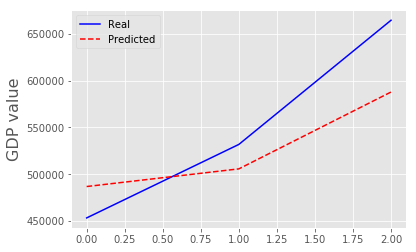

Model statistics:

SSE 40281951793.502
R^2: 0.957
Durbin-Watson: 0.842


In [53]:
#########______Dynamic__AR___prediction____###########

# split dataset
X = Series.from_csv('gdp-with-dates.csv', header=None).values
train, test = X[0:len(X)-3], X[len(X)-3:]

#print(train)
# train autoregression
model = AR(train)
model_fit = model.fit()

print('model AR(%s):' % model_fit.k_ar)
print ('y(k) = %3.f' %model_fit.params[0], end = " ")
for i in range(1,model_fit.k_ar+1):
    if (model_fit.params[i] > 0):
        print ('+ %.3f' % model_fit.params[i], 'y(k - %d)' % i, end = " ")
    else:
        print ('- %.3f' % abs(model_fit.params[i]),'y(k - %d)' %i, end = " ")
print ('\n')

window = model_fit.k_ar
#prediction_start = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
'''history = train[len(train)-prediction_start:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-prediction_start,length)]
	yhat = coef[0]
	for d in range(prediction_start):
		yhat += coef[d+1] * lag[prediction_start-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
'''
prediction_start = len(model_fit.params)
y_predictions = model_fit.predict(start=prediction_start - 1, end=len(X) - 1, dynamic=True)
predictions = y_predictions[-len(test):]
    
# plot results
fig = pyplot.figure()
#fig.suptitle('Expected vs predicted values', fontsize=20)
#pyplot.xlabel('Quarterly value', fontsize=16)
pyplot.ylabel('GDP value', fontsize=16)

line_real, = pyplot.plot(test, color='blue', label='real')
line_predict, = pyplot.plot(predictions, color='red', linestyle='dashed', label='predicted')
pyplot.legend([line_real, line_predict], ['Real', 'Predicted'])
pyplot.show()

fact_sample = X[prediction_start-1:]
predicted_sample = y_predictions

# We need to 
print('Model statistics:', end='\n\n')
_ = sse(fact_sample, predicted_sample)
_ = r_square(fact_sample, predicted_sample)
_ = durbin_watson(fact_sample, predicted_sample)
#_ = theil(test, predictions)

In [54]:
print('Prediction statistics: ')
_ = rmse(test, predictions)
_ = mape(test, predictions)
_ = theil(test, predictions)

Prediction statistics: 
SSE 7712469912.938
RMSE 50703.287
MAPE 7.962
Theil coefficient 0.066


In [55]:
####___AR_dforecast_for_3_quarters__###

print('Predictions for III qr. 2016 and I qr. 2017 year')
print ('Dynamic: How many steps do you want to predict? ')
num_steps = int(input())
predictions = model_fit.predict(start=len(model_fit.params) - 1, end=len(X)+num_steps - 1, dynamic=True)
predicted_array = predictions[-num_steps:]
for i in range(len(predicted_array)):
	print('%d predicted=%f' %(i, predicted_array[i]))

    
# plot results
#pyplot.plot(X[11:])
#pyplot.plot(predictions, color='red')
#pyplot.show()

Predictions for III qr. 2016 and I qr. 2017 year
Dynamic: How many steps do you want to predict? 
23
0 predicted=609060.695507
1 predicted=540757.341763
2 predicted=559535.728858
3 predicted=651666.939797
4 predicted=675947.761997
5 predicted=598107.470989
6 predicted=616557.599776
7 predicted=719952.315174
8 predicted=748111.526345
9 predicted=659747.188436
10 predicted=677750.962485
11 predicted=793948.532895
12 predicted=826718.961915
13 predicted=726470.548939
14 predicted=743574.634313
15 predicted=874010.046011
16 predicted=911996.912563
17 predicted=798184.508029
18 predicted=813778.030575
19 predicted=960098.897712
20 predicted=1004132.991522
21 predicted=875038.164754
22 predicted=888583.767313


/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Best lag 1, best ma 1
model AR(1):
[  2.36128464e+05   9.67661270e-01   2.58579389e-01]
[ 0.25857939]
y(k) = 236128 + 0.968 y(k - 1) + 0.259 x (k - 1) 

0
58
58
predicted=487475.685368, expected=453185.000000
predicted=401534.401368, expected=531838.000000
predicted=352486.460670, expected=664717.000000
Coefficients: [  2.36128464e+05   9.67661270e-01   2.58579389e-01]


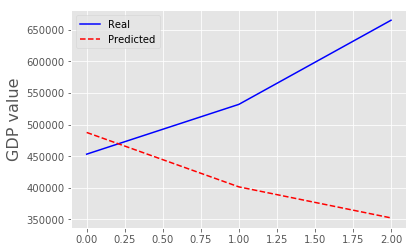

In [56]:
## ______ARMA_______########################

# split dataset
X = Series.from_csv('gdp-with-dates.csv', header=None).values
train, test = X[0:len(X)-3], X[len(X)-3:]

y = train.view('float64')
y[:] = train

best_lag, best_ma = 0, 0
best_error = np.inf#10.0 ** 18
for lag in range(1, 3):
    for ma in range(1, 3):
        try:
            model = ARMA(y, (lag, ma))
            model_fit = model.fit()
            predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
            #for i in range(len(predictions)):
            #    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
            error = mean_squared_error(test, predictions)
            #print("Lag {0}, Ma {1}".format(lag, ma))
            #print('Test MSE: %.3f' % error)
            if best_error > error:
                best_error = error
                best_lag, best_ma = lag, ma
        except Exception as e:
            #print(e, end='\n\n')
            pass
        
        
        
print("Best lag {0}, best ma {1}".format(best_lag, best_ma))
model = ARMA(y, (best_lag, best_ma))
model_fit = model.fit()
print('model AR(%s):' % model_fit.k_ar)
print(model_fit.params)
print(model_fit.maparams)
print ('y(k) = %3.f' %model_fit.params[0], end = " ")

for i in range(1, model_fit.k_ar+model_fit.k_ma+1):
    if i - model_fit.k_ar <= 0:
        if model_fit.params[i] > 0:
            print ('+ %.3f' % model_fit.params[i], 'y(k - %d)' % i, end = " ")
        else:
            print ('- %.3f' % abs(model_fit.params[i]),'y(k - %d)' %i, end = " ")
    else:
        j = i - model_fit.k_ar - 1
        if model_fit.maparams[j] < 0:
            print('- %.3f' %abs(model_fit.maparams[j]), 'x (k - %d)' % (j + 1), end = " ")
        else:
            print('+ %.3f' %model_fit.maparams[j], 'x (k - %d)' % (j + 1), end = " ")
print ('\n')

prediction_start = model_fit.k_ar - 1
print(prediction_start)
y_predictions = model_fit.predict(start=model_fit.k_ar, end=len(X)-1, dynamic=False)
print(len(y_predictions))
print(len(X[prediction_start + 1:]))
          

for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
print('Coefficients: %s' % model_fit.params)
coef = model_fit.params

# plot results
fig = pyplot.figure()
#fig.suptitle('Expected vs predicted values', fontsize=20)
#pyplot.xlabel('Quarterly value', fontsize=16)
pyplot.ylabel('GDP value', fontsize=16)

line_real, = pyplot.plot(test, color='blue', label='real')
line_predict, = pyplot.plot(predictions, color='red', linestyle='dashed', label='predicted')
pyplot.legend([line_real, line_predict], ['Real', 'Predicted'])
pyplot.show()

fact_sample = X[prediction_start + 1:]
predicted_sample = y_predictions




In [57]:
print('Model statistics:', end='\n\n')
_ = sse(fact_sample, predicted_sample)
_ = r_square(fact_sample, predicted_sample)
_ = durbin_watson(fact_sample, predicted_sample)

Model statistics:

SSE 1207791030080264544334082704450737143808.000
R^2: 0.004
Durbin-Watson: 0.018


In [58]:
print('ARMA Prediction statistics: ')
_ = rmse(test, predictions)
_ = mape(test, predictions)
_ = theil(test, predictions)

ARMA Prediction statistics: 
SSE 115642788609.382
RMSE 196335.418
MAPE 26.346
Theil coefficient 0.282


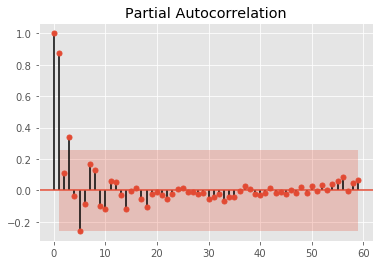

In [59]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
series = Series.from_csv('gdp-with-dates.csv', header=None)
plot_pacf(series, lags = 59)
pyplot.show()

AR(1):
[  9.65846027e+03   1.00074643e+00]
[  1.37374136e+07   2.76058917e+07   6.85588671e+07   5.57861571e+08
   2.19842828e+06   2.81977812e+07   5.44060928e+07   4.36258184e+08
   3.67697166e+06   1.22785572e+08   8.13181757e+07   4.73027387e+08
   1.50449056e+07   1.30407781e+08   1.46778433e+07   1.03597628e+09
   1.04717532e+08   2.66807772e+08   9.59897098e+06   8.65136469e+08
   3.11962303e+08   5.23630946e+08   3.06982584e+07   1.10508743e+09
   1.20913573e+09   9.35341769e+08   1.78107730e+09   4.21534307e+09
   2.33339178e+08   6.96153815e+08   5.91929773e+04   2.75356930e+09
   8.78965423e+08   1.20040705e+09   1.48712265e+07   3.53832504e+09
   1.89131037e+09   2.39173656e+09   2.62294329e+08   6.49520424e+09
   2.03138738e+09   9.89284930e+08   3.19443427e+08   7.80891503e+09
   1.62219428e+09   1.01022465e+09   1.39202982e+05   9.48018663e+09
   3.09035844e+09   2.31756664e+09   1.10240241e+07   6.66022818e+09
   4.86942100e+09   9.73453189e+09   1.16523883e+08   2.0076

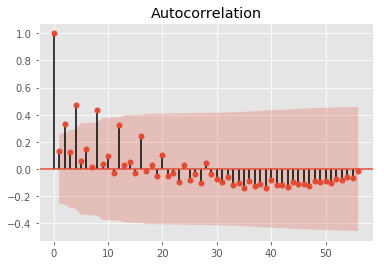

ARCH(2)
eps^2(k) = 1102055090 + 0.101 eps^2(k - 1) + 0.237 eps^2(k - 2) 

[  1.10205509e+09   1.01430776e-01   2.37352942e-01]
Model statistics:

SSE 576763173839826452480.000
R^2: 0.113
Durbin-Watson: 1.936
Prediction statistics: 
SSE 292441614281422241792.000
RMSE 9873223287.955
MAPE 57.168
Theil coefficient 0.801


ARCH(3)
eps^2(k) = 1229837478 + 0.119 eps^2(k - 1) + 0.240 eps^2(k - 2) - 0.104 eps^2(k - 3) 

[  1.22983748e+09   1.18783899e-01   2.40473340e-01  -1.04227985e-01]
Model statistics:

SSE 592565117448899919872.000
R^2: 0.084
Durbin-Watson: 1.812
Prediction statistics: 
SSE 311638107454969675776.000
RMSE 10192122897.201
MAPE 63.625
Theil coefficient 0.831


ARCH(4)
eps^2(k) = 187173675 + 0.146 eps^2(k - 1) + 0.135 eps^2(k - 2) - 0.157 eps^2(k - 3) + 0.996 eps^2(k - 4) 

[  1.87173675e+08   1.46011232e-01   1.34561957e-01  -1.57248007e-01
   9.96079675e-01]
Model statistics:

SSE 331333267251380158464.000
R^2: 0.486
Durbin-Watson: 1.830
Prediction statistics: 
SSE 243911236

In [93]:
###########_______ARCH_________#############
X = Series.from_csv('gdp-with-dates.csv', header=None).values
train, test = X[0:len(X)-3], X[len(X)-3:]


print('AR(1):')
model = AR(train)
model_fit = model.fit(maxlag=1)
print(model_fit.params)
start_prediction = model_fit.k_ar

y_predictions = model_fit.predict(start=start_prediction, end=len(X) - 1, dynamic=False)

fact_sample = X[start_prediction:]
predicted_sample = y_predictions

resids = np.subtract(fact_sample, predicted_sample)
resids_square = np.square(resids)
print(resids_square)

plot_acf(resids_square, lags=56)
pyplot.show()



model_order = range(2, 6)
for order in model_order:
    print('ARCH(%d)' % order)
    train, test = resids_square[:-3][::], resids_square[-3:][::]
    model = AR(train)
    model_fit = model.fit(maxlag=order)
    
    
    print ('eps^2(k) = %3.f' %model_fit.params[0], end = " ")
    for i in range(1, model_fit.k_ar+1):
        if (model_fit.params[i] > 0):
            print ('+ %.3f' % model_fit.params[i], 'eps^2(k - %d)' % i, end = " ")
        else:
            print ('- %.3f' % abs(model_fit.params[i]),'eps^2(k - %d)' %i, end = " ")
    print ('\n')

    
    print(model_fit.params)
    start_prediction = model_fit.k_ar

    y_predictions = model_fit.predict(start=start_prediction, end=len(resids_square) - 1, dynamic=False)

    fact_sample = resids_square[start_prediction:][::]
    predicted_sample = y_predictions[::]
    
    print('Model statistics:', end='\n\n')
    _ = sse(fact_sample, predicted_sample)
    _ = r_square(fact_sample, predicted_sample)
    _ = durbin_watson(fact_sample, predicted_sample)
    
    predictions = y_predictions[-3:][::]
    print('Prediction statistics: ')
    _ = rmse(test, predictions)
    _ = mape(test, predictions)
    _ = theil(test, predictions)
    
    print("\n")



In [61]:
####GARCH###



h_resids = []
num_resids = resids.shape[0]
resids_sum = resids[0]
for k in range(1, num_resids):
    resids_sum += resids[k]
    resids_average = resids_sum/k
    pacf = 0
    for i in range(0, k + 1):    
        pacf += np.square(resids[i] - resids_average)
    h_resids.append(pacf/k)
print(h_resids)

pyplot.plot(h_resids)
pyplot.show()


plot_acf(h_resids, lags=56)
pyplot.show()

0.8.0
['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']
